In [1]:
#importing dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#using pandas to read the database
data = pd.read_csv("mnist_test.csv")

In [3]:
#viewing column heads
data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#extracting the data
a = data.iloc[3,1:].values


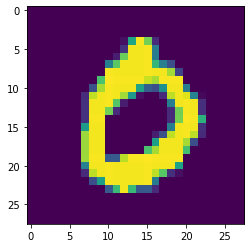

In [5]:
#reshaping the extracted data
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [18]:
#preparing the data
#separating the data values and labels
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]


In [19]:
#creating test and train sizes/batches
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size = 0.2,random_state = 4)

In [20]:
#check data
y_train.head()

4983    3
6789    1
2221    1
6043    5
1564    7
Name: label, dtype: int64

In [21]:
#call RF classifier
rf = RandomForestClassifier(n_estimators = 100)


In [22]:
#fit the model
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
#prediction on test data
pred = rf.predict(x_test)

In [24]:
pred

array([1, 3, 7, ..., 0, 1, 0], dtype=int64)

In [25]:
#check prediction accuracy
s = y_test.values

#calculate no of correctly predicted values
count = 0
for i in range(len(pred)):
    if pred[i]==s[i]:
        count+=1

In [26]:
count

1899

In [27]:
#total values in the prediction
len(pred)

2000

In [28]:
#accuracy value
1898/2000

0.949